In [ ]:
# Clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17022, done.
remote: Total 17022 (delta 0), reused 0 (delta 0), pack-reused 17022 (from 1)
Receiving objects: 100% (17022/17022), 15.61 MiB | 11.57 MiB/s, done.
Resolving deltas: 100% (11690/11690), done.


In [ ]:
%cd yolov5

/content/yolov5


In [ ]:
# Install dependencies
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.6/877.6 kB 51.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**create the dataset.yaml file**

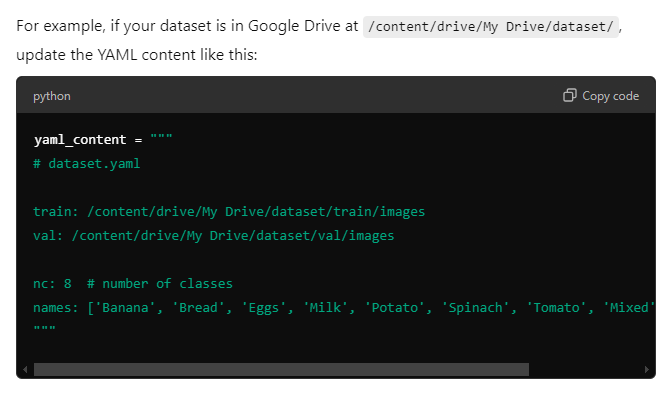

In [ ]:
# Define the path where you want to save the .yaml file in Google Drive
yaml_file_path = '/content/drive/MyDrive/deep_learning/prj/dataset.yaml'

# Content of the dataset.yaml file
yaml_content = """
# dataset.yaml

train: /content/drive/MyDrive/Dataset_Fridge/augmented/split_dataset/new_train/images
val: /content/drive/MyDrive/Dataset_Fridge/augmented/split_dataset/new_val/images

nc: 8  # number of classes
names: ['Banana', 'Bread', 'Eggs', 'Milk', 'Potato', 'Spinach', 'Tomato', 'Mixed']  # class names
"""

# Write the content to the file
with open(yaml_file_path, 'w') as file:
    file.write(yaml_content)

print(f"dataset.yaml created successfully at {yaml_file_path}")


dataset.yaml created successfully at /content/drive/MyDrive/deep_learning/prj/dataset.yaml


**Train the YOLOv5 Model**
Once your dataset is structured and the YAML file is ready, you can start training. YOLOv5 offers different model sizes, such as yolov5s, yolov5m, yolov5l, and yolov5x. For a smart fridge application, starting with yolov5s (the small version) is a good idea, as it’s faster and may be sufficient for your task.

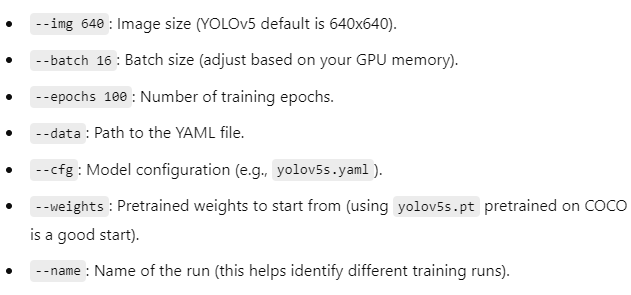

In [ ]:
# Train YOLOv5 model
!python train.py --img 416 --batch 64 --epochs 110 --data /content/drive/MyDrive/deep_learning/prj/dataset.yaml --cfg yolov5s.yaml --weights yolov5s.pt --name fridgeVision_s_model1

Streaming output truncated to the last 5000 lines.
     64/109      7.18G    0.03088    0.02756   0.003388        357        416:  29% 15/52 [00:22<01:19,  2.14s/it]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
     64/109      7.18G    0.03097    0.02744   0.003647        307        416:  31% 16/52 [00:22<01:00,  1.67s/it]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
     64/109      7.18G    0.03104    0.02746     0.0037        316        416:  33% 17/52 [00:25<01:09,  1.99s/it]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
     64/109      7.18G    0.03121    

**Result**

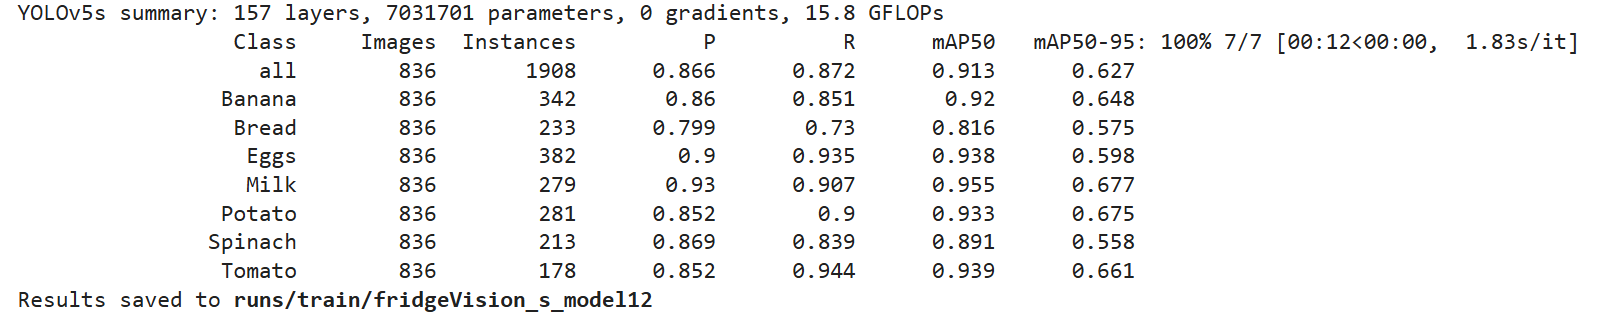

In [ ]:
# Copy the entire training folder to Google Drive
!cp -r /content/yolov5/runs/ /content/drive/MyDrive/fridge_final_after_edition_txt/runs/

cp: cannot stat '/content/yolov5/runs/train/content/yolov5/runs/': No such file or directory


Monitor Training Progress

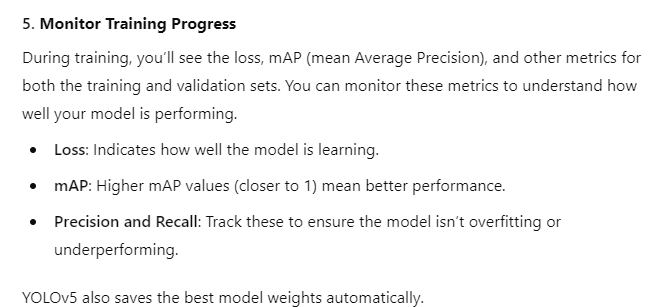

Evaluate the Model
After training, you can evaluate the model on the validation set:

In [ ]:
!python val.py --weights /content/yolov5/runs/train/fridgeVision_model1/weights/best.pt --data /content/drive/MyDrive/deep_learning/prj/dataset.yaml --img 416

val: data=/content/drive/MyDrive/deep_learning/prj/dataset.yaml, weights=['/content/yolov5/runs/train/fridgeVision_model1/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-368-gb163ff8d Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/drive/MyDrive/Dataset_Fridge/augmented/split_dataset/new_val/labels.cache... 1162 images, 0 backgrounds, 326 corrupt: 100% 1162/1162 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/drive/MyDrive/Dataset_Fridge/augmented/split_dataset/new_val/images/Eggs_0_aug_4.jpg: ignoring corrupt image/label: negative label values [   -0.13458   -0.018972]
val: WARNING ⚠️ /content/drive

This will give you metrics like mAP, precision, recall, and F1-score to assess how well the model performs on unseen validation data.

**Test the Model on Unseen Images Downloaded from Cloud**
You can now test the trained model on new images or a test set:

Banana

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/fridgeVision_s_model12/weights/best.pt --img 416 --source /content/drive/MyDrive/Dataset_Fridge/UnseenData/0_b.jpg --conf 0.4


detect: weights=['/content/yolov5/runs/train/fridgeVision_s_model12/weights/best.pt'], source=/content/drive/MyDrive/Dataset_Fridge/UnseenData/0_b.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/Dataset_Fridge/UnseenData/0_b.jpg: 288x416 3 Bananas, 30.2ms
Speed: 0.5ms pre-process, 30.2ms inference, 647.3ms NMS per image at shape (1, 3, 416, 416)
Results saved

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/fridgeVision_s_model12/weights/best.pt --img 416 --source /content/drive/MyDrive/Dataset_Fridge/UnseenData/bread.jpeg --conf 0.4


detect: weights=['/content/yolov5/runs/train/fridgeVision_s_model12/weights/best.pt'], source=/content/drive/MyDrive/Dataset_Fridge/UnseenData/bread.jpeg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/Dataset_Fridge/UnseenData/bread.jpeg: 416x416 1 Banana, 7.2ms
Speed: 0.5ms pre-process, 7.2ms inference, 714.1ms NMS per image at shape (1, 3, 416, 416)
Results sa

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/fridgeVision_s_model12/weights/best.pt --img 416 --source /content/drive/MyDrive/Dataset_Fridge/UnseenData/egg.jpg --conf 0.4


detect: weights=['/content/yolov5/runs/train/fridgeVision_s_model12/weights/best.pt'], source=/content/drive/MyDrive/Dataset_Fridge/UnseenData/egg.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/Dataset_Fridge/UnseenData/egg.jpg: 320x416 2 Spinachs, 47.4ms
Speed: 0.7ms pre-process, 47.4ms inference, 789.7ms NMS per image at shape (1, 3, 416, 416)
Results save

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/fridgeVision_s_model12/weights/best.pt --img 416 --source /content/drive/MyDrive/Dataset_Fridge/UnseenData/milk.jpg --conf 0.4


detect: weights=['/content/yolov5/runs/train/fridgeVision_s_model12/weights/best.pt'], source=/content/drive/MyDrive/Dataset_Fridge/UnseenData/milk.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/Dataset_Fridge/UnseenData/milk.jpg: 416x224 1 Banana, 45.4ms
Speed: 0.6ms pre-process, 45.4ms inference, 735.0ms NMS per image at shape (1, 3, 416, 416)
Results save

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/fridgeVision_s_model12/weights/best.pt --img 416 --source /content/drive/MyDrive/Dataset_Fridge/UnseenData/mix.jpg --conf 0.4


detect: weights=['/content/yolov5/runs/train/fridgeVision_s_model12/weights/best.pt'], source=/content/drive/MyDrive/Dataset_Fridge/UnseenData/mix.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/Dataset_Fridge/UnseenData/mix.jpg: 320x416 (no detections), 29.2ms
Speed: 0.5ms pre-process, 29.2ms inference, 9.0ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp7


In [ ]:
!python detect.py --weights /content/yolov5/runs/train/fridgeVision_s_model12/weights/best.pt --img 416 --source /content/drive/MyDrive/Dataset_Fridge/UnseenData/potato.jpg --conf 0.4


detect: weights=['/content/yolov5/runs/train/fridgeVision_s_model12/weights/best.pt'], source=/content/drive/MyDrive/Dataset_Fridge/UnseenData/potato.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/Dataset_Fridge/UnseenData/potato.jpg: 224x416 2 Milks, 29.6ms
Speed: 0.5ms pre-process, 29.6ms inference, 606.3ms NMS per image at shape (1, 3, 416, 416)
Results s

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/fridgeVision_s_model12/weights/best.pt --img 416 --source /content/drive/MyDrive/Dataset_Fridge/UnseenData/spinach.jpg --conf 0.4


detect: weights=['/content/yolov5/runs/train/fridgeVision_s_model12/weights/best.pt'], source=/content/drive/MyDrive/Dataset_Fridge/UnseenData/spinach.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/Dataset_Fridge/UnseenData/spinach.jpg: 416x416 1 Potato, 11.3ms
Speed: 0.7ms pre-process, 11.3ms inference, 812.1ms NMS per image at shape (1, 3, 416, 416)
Result

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/fridgeVision_s_model12/weights/best.pt --img 416 --source /content/drive/MyDrive/Dataset_Fridge/UnseenData/tomato.jpg --conf 0.4


detect: weights=['/content/yolov5/runs/train/fridgeVision_s_model12/weights/best.pt'], source=/content/drive/MyDrive/Dataset_Fridge/UnseenData/tomato.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/Dataset_Fridge/UnseenData/tomato.jpg: 416x288 (no detections), 29.3ms
Speed: 0.5ms pre-process, 29.3ms inference, 11.2ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp10


In [ ]:
!python detect.py --weights /content/yolov5/runs/train/fridgeVision_s_model12/weights/best.pt --img 416 --source /content/drive/MyDrive/Dataset_Fridge/UnseenData/WSLICE.jpg --conf 0.4


detect: weights=['/content/yolov5/runs/train/fridgeVision_s_model12/weights/best.pt'], source=/content/drive/MyDrive/Dataset_Fridge/UnseenData/WSLICE.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/Dataset_Fridge/UnseenData/WSLICE.jpg: 416x416 1 Banana, 7.2ms
Speed: 0.6ms pre-process, 7.2ms inference, 593.4ms NMS per image at shape (1, 3, 416, 416)
Results sa

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/fridgeVision_s_model12/weights/best.pt --img 416 --source /content/drive/MyDrive/Dataset_Fridge/UnseenData/images.jpeg --conf 0.4


detect: weights=['/content/yolov5/runs/train/fridgeVision_s_model12/weights/best.pt'], source=/content/drive/MyDrive/Dataset_Fridge/UnseenData/images.jpeg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/Dataset_Fridge/UnseenData/images.jpeg: 416x416 1 Spinach, 7.2ms
Speed: 0.5ms pre-process, 7.2ms inference, 592.4ms NMS per image at shape (1, 3, 416, 416)
Results